# Explore here

In [1]:
import numpy as np, random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import os.path
import joblib
import sklearn
import sklearn.metrics as metrics

EDA
PASO1) OBTENCION Y LIMPIEZA DE DATOS:

In [2]:
df_rd= pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df_rd.to_csv("../data/raw/df_rd.csv", index=False)
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#1.1) FILTRADO DE NANS Y NULLS.
df_rd = df_rd.drop_duplicates().reset_index(drop = True)
df_rd = df_rd.fillna(0)
df_rd.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
#1.2) IDENTIFICACION TARGET Y ETIQUETACION DE PREDICTORAS.
#NUESTRO TARGET ES OUTCOME, VARIABLE QUE NOS INDICA CON 0 QUE NO TIENE DIABETES, Y UNO QUE SI TIENE.
#EL OBJETIVO ES REALIZAR UN MODELO QUE PREDIGA DADO UNOS DATOS SI EL PACIENTE TIENE DIABETES.
def vartype(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    df_tipos = pd.DataFrame({'Tipo': ['Numérica']*len(num_cols) + ['Categórica']*len(cat_cols),
                            'Columna': num_cols + cat_cols})
    total_num = len(num_cols)
    total_cat = len(cat_cols)
    total_general = total_num + total_cat
    # Crear una lista de diccionarios para las nuevas filas
    new_rows = [{'Tipo': 'Total Numérico', 'Columna': total_num},
                {'Tipo': 'Total Categórico', 'Columna': total_cat},
                {'Tipo': 'Total General', 'Columna': total_general},]
    df_tipos = pd.concat([df_tipos, pd.DataFrame(new_rows)], ignore_index=True)
    return df_tipos
df_rd_vars= vartype(df_rd)
print(df_rd_vars)

                Tipo                   Columna
0           Numérica               Pregnancies
1           Numérica                   Glucose
2           Numérica             BloodPressure
3           Numérica             SkinThickness
4           Numérica                   Insulin
5           Numérica                       BMI
6           Numérica  DiabetesPedigreeFunction
7           Numérica                       Age
8           Numérica                   Outcome
9     Total Numérico                         9
10  Total Categórico                         0
11     Total General                         9


In [ ]:
#1.3) SIMPLIFICACION DEL DATAFRAME.
#NOS SERVIREMOS DE LA FUNCIONALIDAD SELECTKBEST PARA SIMPLIFICAR EL DATAFRAME, SE SIRVE DE CRITERIOS MATEMATICOS PARA ESCOGER LAS PREDICTORAS.
#AL NO HABER CATEGORICAS NO USAREMOS EL MODO CHI2, SOLO EL F_reg.
#DE ENTRADA INTENTAREMOS REDUCIR EL NUMERO DE PREDICTORAS DE 8 A 6.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Suponiendo que 'df_rd' es tu DataFrame y 'target' es la columna objetivo
X = df_rd.drop('Outcome', axis=1)  # Características
y = df_rd['Outcome']  # Variable objetivo
# Seleccionar las 6 mejores características (ajusta el valor de k según tus necesidades)
selector = SelectKBest(f_regression, k=6)
X_new = selector.fit_transform(X, y)
# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]
# Crear un nuevo DataFrame con las características seleccionadas y la variable objetivo
df_Eda = pd.DataFrame(X_new, columns=selected_features)
df_Edav7 = pd.concat([df_Eda, y], axis=1)  #Agregamos manualmente la target y al dataframe para completarlo.
df_Edav7.to_csv('../data/processed/df_edav7.csv', index=False)
# Visualizar las primeras filas del DataFrame
print(df_Edav7.describe())



       Pregnancies     Glucose     Insulin         BMI  \
count   768.000000  768.000000  768.000000  768.000000   
mean      3.845052  120.894531   79.799479   31.992578   
std       3.369578   31.972618  115.244002    7.884160   
min       0.000000    0.000000    0.000000    0.000000   
25%       1.000000   99.000000    0.000000   27.300000   
50%       3.000000  117.000000   30.500000   32.000000   
75%       6.000000  140.250000  127.250000   36.600000   
max      17.000000  199.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max          

Nuestro dataframe resultante es tal y como queriamos, 6 predictoras y nuestra 'Outcome' como var target, total 7 vars.(df_Edav7, df_Eda(es el dataframe procesado de df_rd(dataframe_RawData)) con 7 variables(v7))
Podemos echar un vistazo al heatmap para ver correlaciones, y usando criterio de correlacion simplificarlo aun mas.(No hay necesidad de hacerlo en este caso, ya hay pocas variables.)

1.4)FILTRADO DF: Bifurcacion dataframe con outliers(col), y sin outliers(sol), guardando datos atipicos en diccionarios por variable(fmt Json)

In [10]:
#dataframe sin outliers.
df_E7_sol= df_Edav7.copy()
df_E7_sol.to_csv('../data/processed/df_E7_sol.csv', index=False)
#dataframe con outliers.
df_E7_col= df_Edav7.copy()
df_E7_col.to_csv('../data/processed/df_E7_col.csv', index=False)

#3.2) guardar outliers en la carpeta lims
def LimsOlSaveJson(df, columns, output_path, lower_limit_zero=True):
    for column in columns:
        stats = df[column].describe()
        iqr = stats['75%'] - stats['25%']
        ul = stats['75%'] + (2 * iqr)
        ll = max(stats['25%'] - (2 * iqr), 0 if lower_limit_zero else None)
        limits = {"upper_limit": ul, "lower_limit": ll}

        # Traducir signos especiales que dan error a la hora de guardar
        safe_column_name = column.replace(' ', '_').replace('/', '_').replace('%', '_')

        file_path = f"{output_path}/limits_{safe_column_name}.json"
        with open(file_path, "w") as f:
            json.dump(limits, f, indent=4)

        df[column] = df[column].apply(lambda x: ul if x > ul else ll if x < ll else x)

    return df


num_vars = df_E7_sol.select_dtypes(include=np.number).columns.tolist()
LimsOlSaveJson(df_E7_sol, num_vars, '../data/processed/lims')
df_E7_sol.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.843750,121.001953,75.793620,32.093490,0.464221,33.233073,0.348958
std,3.364678,31.591205,99.638759,7.344182,0.300544,11.730418,0.476951
min,0.000000,16.500000,0.000000,8.700000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,16.000000,199.000000,381.750000,55.200000,1.391250,75.000000,1.000000


Trabajaremos con el dataframe sin outliers, alguno pensara que siendo personas no se deberia hacer, pero hay valores biologicos surrealistas como valores atipicos,
mejor entrenar un modelo que se ajuste a la gran mayoria de personas.
Tamnbien he decidio trabajar con datos originales sin Normalizar/estandarizar.

PASO 2) ANÁLISIS UNIVARIABLE NUMERICA.


/tmp/ipykernel_10338/1124785308.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row_index, col_index].set_xticklabels(axs[row_index, col_index].get_xticklabels(), rotation=90)
/tmp/ipykernel_10338/1124785308.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row_index, col_index].set_xticklabels(axs[row_index, col_index].get_xticklabels(), rotation=90)
/tmp/ipykernel_10338/1124785308.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row_index, col_index].set_xticklabels(axs[row_index, col_index].get_xticklabels(), rotation=90)
/tmp/ipykernel_10338/1124785308.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row_index, col_index

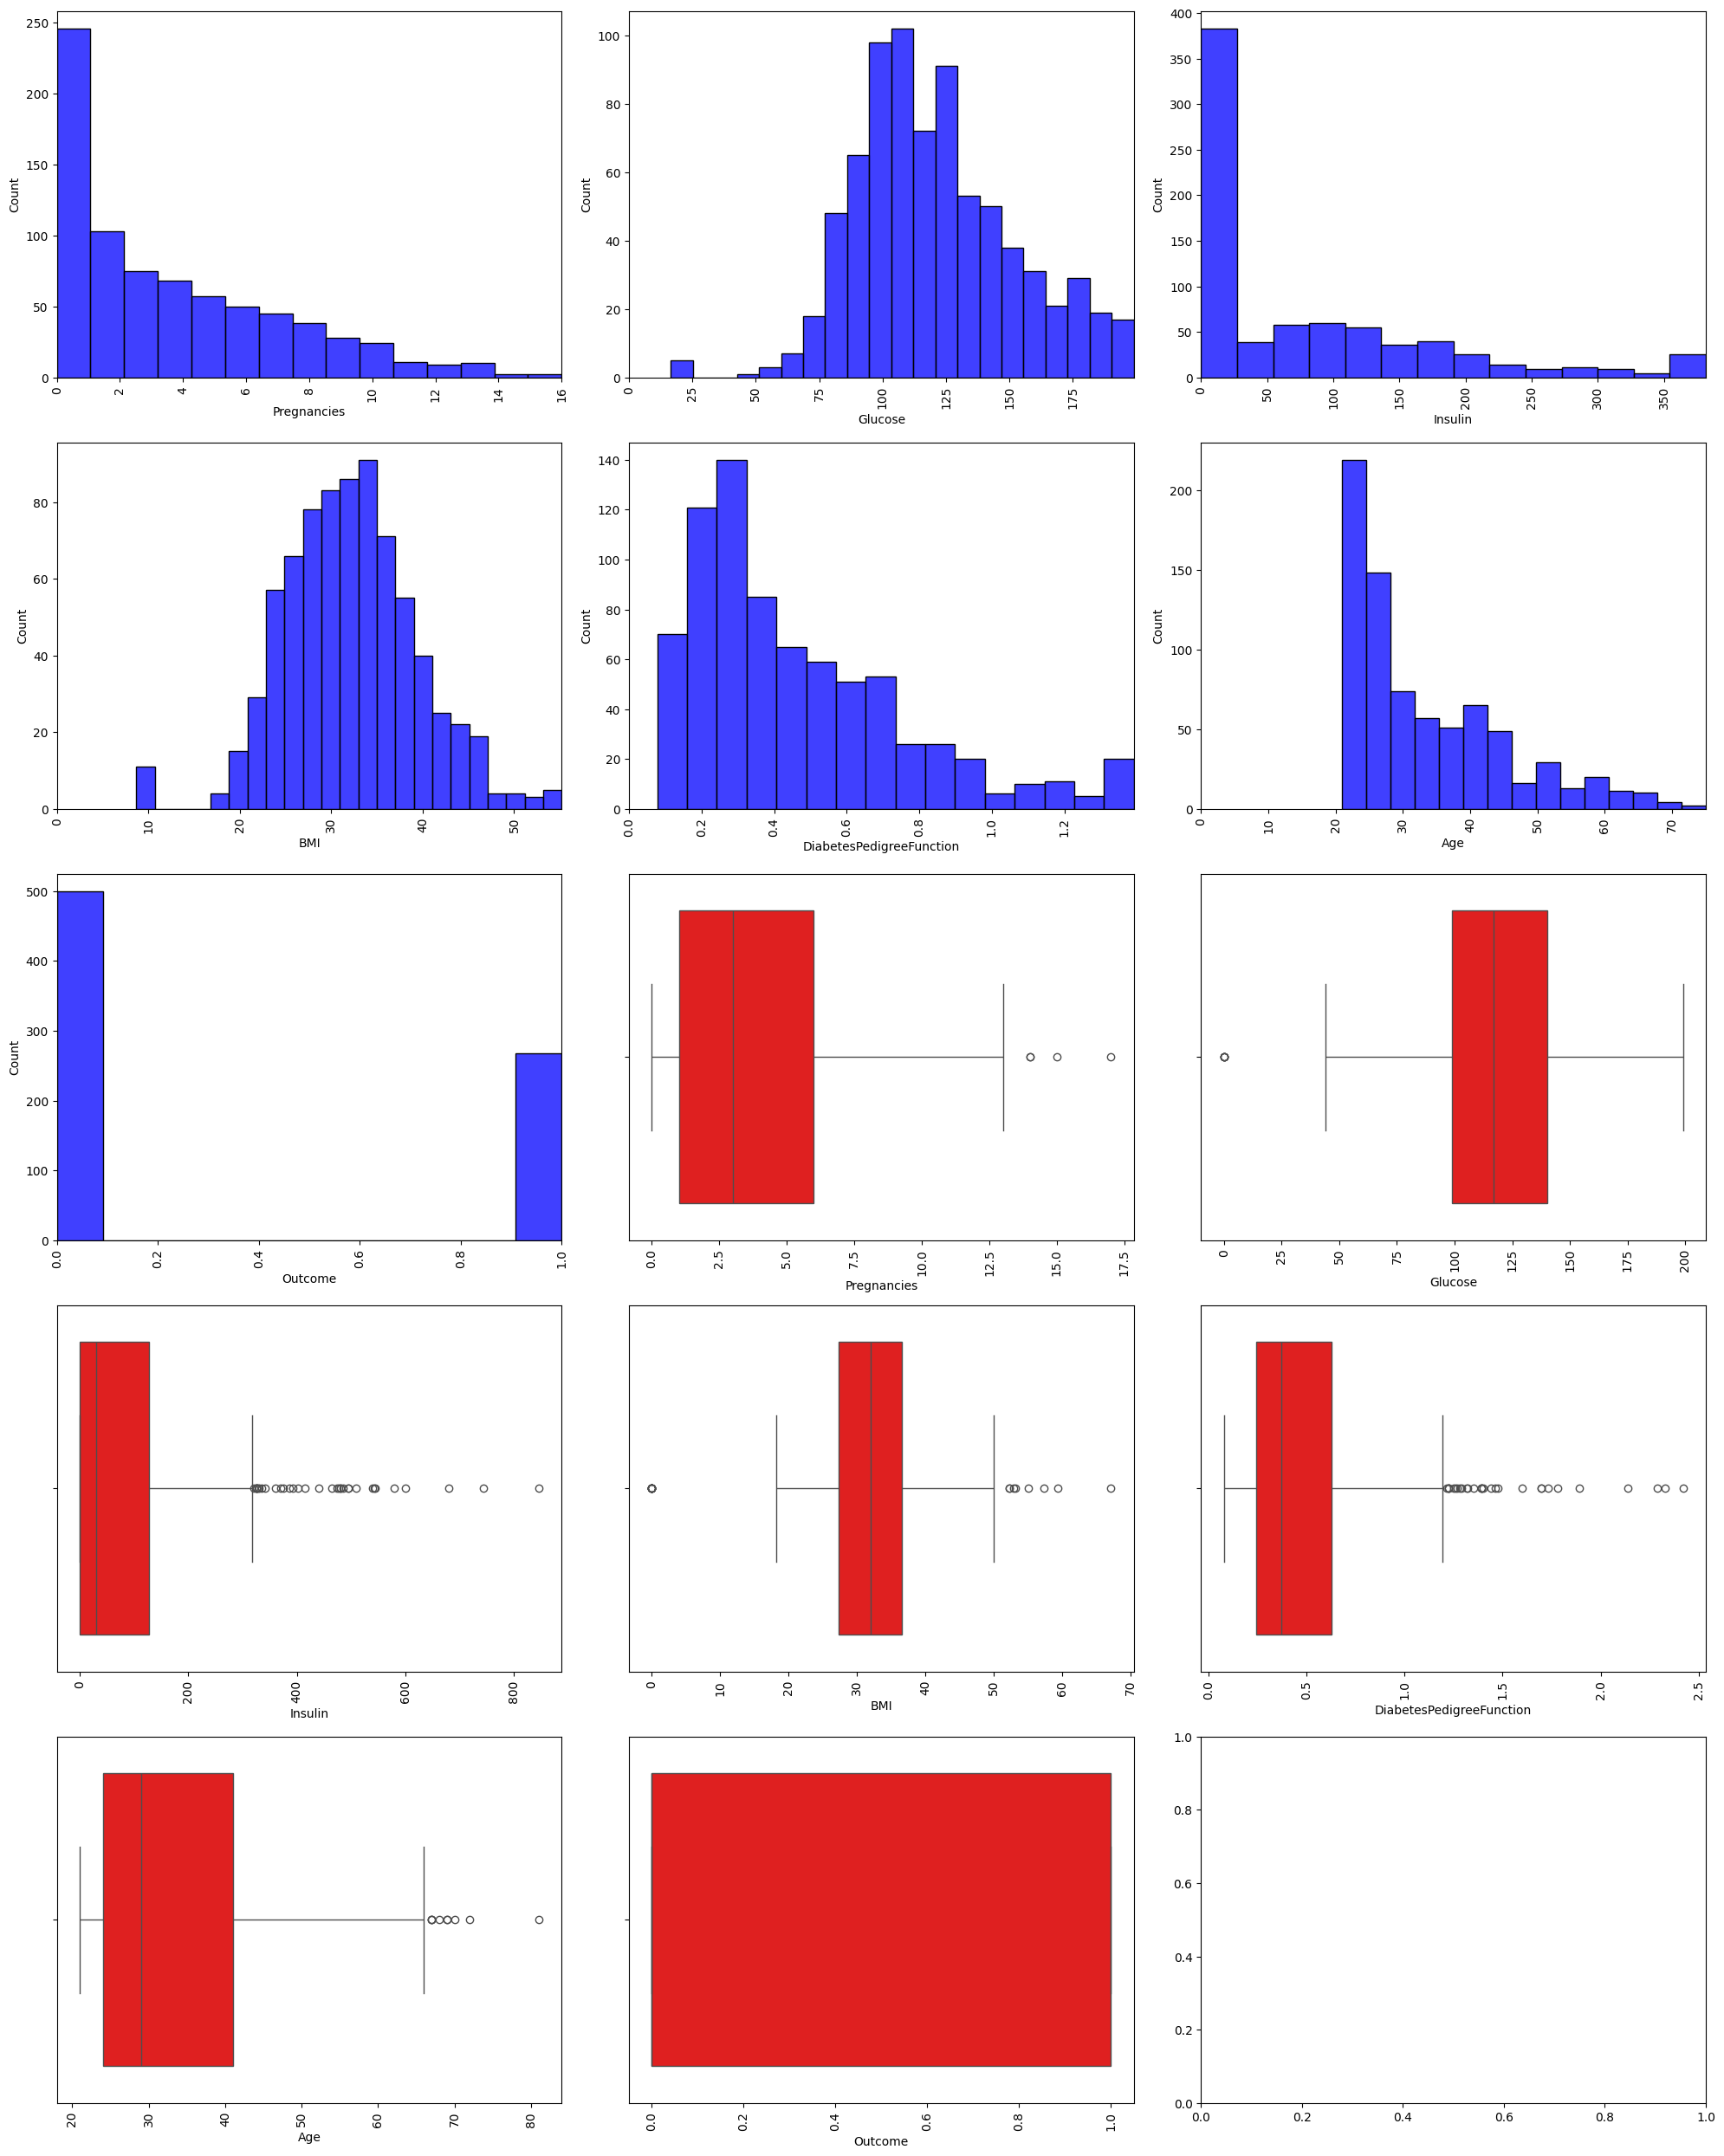

In [11]:
#4 ANálISIS UNIVARIABLE NUMERICO:
import matplotlib.pyplot as plt
import seaborn as sns
import math
def GrafUniNum(df_no_outliers, df_with_outliers, hist_vars, box_vars):
  """
  Creamos un conjunto de graficos, los histogramas sin outliers para presenciar mejor la distribucion,
  los graficos de caja con outliers para visualizarlos.
  Args:
      df_no_outliers
      df_with_outliers
      hist_vars: lista de nombres de columnas.
      box_vars: lista de nombres de columnas.
  """

  num_hist_vars = len(hist_vars)  #Determinamos el numero de variables para el histograma sin Ol's
  num_box_vars = len(box_vars)  #Determinamos el numero de variables para los graficos de caja con Ol's
  total_vars = num_hist_vars + num_box_vars

  #Determinamos la cuadricula de graficos optima, evitando el zero
  if total_vars <= 4:
    row, col = 2, 2  
  elif total_vars <= 6:
    row, col = 2, 3  
  else:
    # Usaremos una rejilla de graficos variable en caso de exceder los casos anteriores.
    row = math.ceil(total_vars / 3)
    col = 3
  fig, axs = plt.subplots(row, col, figsize=(20, 5 * row))
  i = 0
  for var in hist_vars:
    row_index = i // col
    col_index = i % col
    sns.histplot(ax=axs[row_index, col_index], data=df_no_outliers, x=var, color="blue")
    max_val_no_outliers = df_no_outliers[var].max()
    axs[row_index, col_index].set_xlim(0, max_val_no_outliers)
    axs[row_index, col_index].set_xticklabels(axs[row_index, col_index].get_xticklabels(), rotation=90)
    i += 1
  for var in box_vars:
    row_index = i // col
    col_index = i % col
    sns.boxplot(ax=axs[row_index, col_index], data=df_with_outliers, x=var, color="red")
    axs[row_index, col_index].set_xticklabels(axs[row_index, col_index].get_xticklabels(), rotation=90)
    i += 1
  plt.tight_layout()
  plt.show()
#Preparamos la llamada a la funcion y el input
hist_vars = df_E7_sol.columns
box_vars = df_E7_col.columns
GrafUniNum(df_E7_sol, df_E7_col, hist_vars, box_vars)